# Projet EDP ALI Mathis
## Étude numérique de l’équation d’Allen–Cahn

---

## 1. Travail bibliographique

**Origines physiques**

* Introduite par S.M. Allen & J.W. Cahn (1979) pour décrire la cinétique des anti-phase boundaries et le coarsening dans les alliages métalliques.
* Modélise la séparation de phases et la formation d’interfaces « diffuses » d’épaisseur finie dans les systèmes de phase.

**Phénomènes décrits**

* Cinétique de transition de phase et évolution de fronts entre deux états stables.
* Applications : sciences des matériaux, biophysique, pattern formation.

**Références clés**

1. S.M. Allen & J.W. Cahn, *Acta Metall.* 27 (1979) 1085–1095.
2. J.W. Cahn & J.E. Hilliard, *J. Chem. Phys.* 28 (1958) 258–267.
3. A.J. Bray, *Adv. Phys.* 51 (2002) 481–587.


---

## 2. Présentation du modèle

Soit $\Omega\subset\mathbb{R}^d$ et $t\in(0,T)$. L’équation d’Allen–Cahn s’écrit :

$$
\frac{\partial u}{\partial t}
- \varepsilon\,\Delta u
+ f(u)
= 0,
$$

avec :

* **Condition initiale** : $u(x,0)=u_0(x),\quad x\in\Omega.$
* **Condition aux limites** : $u(x,t)=0,\quad x\in\partial\Omega,\;t>0.$

Les paramètres et fonctions associés :

* **$\varepsilon>0$** : coefficient de diffusion, contrôlant l’épaisseur de l’interface.
* **Potentiel double puits** :

  $$
    F(u)=\frac14(u^2-1)^2,
    \quad
    f(u)=F'(u)=u^3 - u.
  $$
* États stables : $u=\pm1$, bistabilité et dynamique de fronts.

---


### 2.1 Analyse mathématique

**Existence et unicité**  
L’équation d’Allen–Cahn est un problème de type parabolique semi-linéaire. Pour  
$
  \partial_t u - \varepsilon\Delta u + f(u) = 0,\quad u|_{t=0}=u_0\in H^1_0(\Omega),
$
avec $f(u)=u^3-u$ de classe $C^1$, on dispose d’un résultat classique :  
- **Existence** d’une solution faible $u\in L^2(0,T;H^1_0(\Omega))\cap H^1(0,T;H^{-1}(\Omega))\$.  
- **Unicité** par unicité de la solution d’un problème parabolique à terme de réaction Lipschitzien.  

**Forme fonctionnelle de Ginzburg–Landau**  
On associe à $u$ l’énergie libre  
$
  E[u]
  = \int_\Omega \Bigl(\tfrac{\varepsilon}{2}\lvert\nabla u\rvert^2 + F(u)\Bigr)\,dx,
  \quad F(u)=\tfrac14(u^2-1)^2.
$  
L’équation d’Allen–Cahn s’interprète comme  
$
  \partial_t u = -\,\frac{\delta E}{\delta u},
$
c’est-à-dire la **descente de gradient** de $E[u]$ dans $L^2(\Omega)$.

**Décroissance de l’énergie**  
En multipliant l’équation par $\partial_t u$ et en intégrant, on montre  
$
  \frac{d}{dt}\,E[u(t)]
  = -\int_\Omega \bigl(\partial_t u\bigr)^2\,dx
  \;\le\;0.
$
Ainsi, $E[u]$ est une **invariant décroissante**, garantissant la stabilité à long terme vers des états stationnaires (solutions de $\varepsilon\Delta u = f(u)$).  


### 3.1 Méthode 1 – Schéma explicite (Euler en temps + différences centrées)

- **Équation discrétisée**  
  $
    \frac{u_i^{n+1} - u_i^n}{\Delta t}
    = \varepsilon\,\frac{u^n_{i+1} - 2u^n_i + u^n_{i-1}}{\Delta x^2}
    \;-\; f(u_i^n),
  $
  avec $f(u)=u^3 - u$.

- **Condition de stabilité (CFL)**  
  $
    \Delta t \le \frac{\Delta x^2}{2\,\varepsilon}.
  $

- **Choix des paramètres**  
  - Domaine $[0, L]$ avec $L=1$.  
  - Temps final $T=0.1$.  
  - Coefficient diffusif $\varepsilon=0.01$.  
  - Maille spatiale $\Delta x = L/(N_x+1)$, $N_x=100$.  
  - Pas de temps $\Delta t = 0.5\Delta x^2/\varepsilon$ pour respecter CFL.  

- **Procédure**  
  1. Initialiser $u^0_i = \sin(\pi x_i)$ et poser $u_0^n = u_{N_x+1}^n = 0$.  
  2. Pour chaque pas de temps $n$, calculer $u^{n+1}_i$ pour $i=1\ldots N_x$.  
  3. Enregistrer quelques profils intermédiaires pour visualiser l’évolution.  


Δx = 9.90e-03, Δt = 4.90e-03, Nb pas = 20


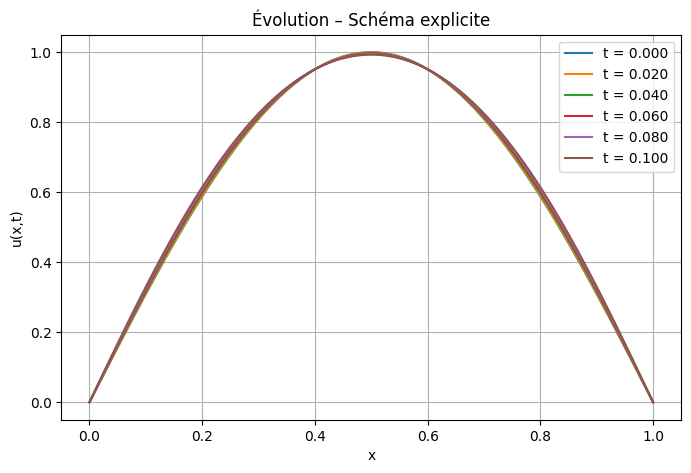

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du problème
L       = 1.0
T       = 0.1
epsilon = 0.01

# Discrétisation
Nx = 100
dx = L / (Nx + 1)
x  = np.linspace(0, L, Nx + 2)
dt = 0.5 * dx**2 / epsilon      # CFL
Nt = int(T / dt)

print(f"Δx = {dx:.2e}, Δt = {dt:.2e}, Nb pas = {Nt}")

# Condition initiale
def initial_condition(x):
    return np.sin(np.pi * x)

# Terme non linéaire
def f(u):
    return u**3 - u

# Initialisation de la solution
u = initial_condition(x)
u[0] = u[-1] = 0.0              # conditions aux limites de Dirichlet

# Stocker quelques états pour l’affichage
solutions = [u.copy()]

# Boucle temps (Euler explicite)
for n in range(Nt):
    u_new = u.copy()
    # mise à jour intérieur
    lap = (u[2:] - 2*u[1:-1] + u[:-2]) / dx**2
    u_new[1:-1] = u[1:-1] + dt*(epsilon * lap - f(u[1:-1]))
    # conditions aux limites
    u_new[0] = u_new[-1] = 0.0
    u = u_new

    # enregistrement ponctuel
    if n % (Nt // 5) == 0:
        solutions.append(u.copy())


### 3.2 Méthode 2 – Schéma Crank–Nicolson semi-implicite

- **Principe**  
  $
    \frac{u^{n+1}_i - u^n_i}{\Delta t}
    = \varepsilon\,\frac{\Delta_h u^{n+1}_i + \Delta_h u^n_i}{2}
    \;+\; f(u^n_i),
  $
  où $\Delta_h$ est le laplacien centré en espace.

- **Formulation matricielle**  
  $
    \Bigl(I - \tfrac{\varepsilon\Delta t}{2}L\Bigr)\,u^{n+1}
    = \Bigl(I + \tfrac{\varepsilon\Delta t}{2}L\Bigr)\,u^n \;+\;\Delta t\,f(u^n).
  $

- **Avantages**  
  - Stabilité non conditionnelle (pas de CFL).  
  - Précision d’ordre 2 en temps.  
  - Système linéaire à chaque pas (on traite $f(u^{n+1})$ explicitement).



In [ ]:
import numpy as np
from scipy.sparse import diags
import scipy.sparse.linalg as spla

def solve_crank_nicolson(u0, dx, dt, eps, Nt):
    """
    Schéma Crank–Nicolson semi-implicite pour Allen–Cahn 1D.
    """
    N = len(u0)
    # Construction du laplacien 1D
    e = np.ones(N)
    L = diags([e, -2*e, e], offsets=[-1,0,1], shape=(N,N)).tocsr() / dx**2
    I = diags([e], [0], shape=(N,N)).tocsr()

    A = I - 0.5 * eps * dt * L
    B = I + 0.5 * eps * dt * L

    u = u0.copy()
    for _ in range(Nt):
        # rhs inclut le terme non linéaire explicite
        b = B.dot(u) + dt * (u**3 - u)
        u = spla.spsolve(A, b)
        u[0] = u[-1] = 0.0    # conditions de Dirichlet
    return u

# Exemple d’utilisation
# u_final = solve_crank_nicolson(u_init, dx, dt, epsilon, Nt)


## 4 Validation et tests

### 4.1 Test de convergence en norme $L^2$

- **Procédure**  
  1. **Solution de référence**  
     - Grille fine : $N_{x,\mathrm{ref}} = 800$  
     - $\Delta x_{\mathrm{ref}} = L/(N_{x,\mathrm{ref}}+1)$, $\Delta t_{\mathrm{ref}} = 0.5\,\Delta x_{\mathrm{ref}}^2/\varepsilon$  
     - Calcul de $u_{\mathrm{ref}}$ par le solveur (explicite ou CN).  
  2. **Grilles tests**  
     $\displaystyle N_x\in\{50,100,200\},\quad \Delta x=L/(N_x+1),\; \Delta t=0.5\,\Delta x^2/\varepsilon.$  
  3. **Erreur**  
     $
       E(N_x)
       = \Bigl(\Delta x\sum_{i=0}^{N_x+1}\bigl(u_i^{\mathrm{num}}-u_{\mathrm{ref}}(x_i)\bigr)^2\Bigr)^{1/2}.
     $
  4. **Ordre de convergence**  
     $\displaystyle p \approx \log_2\bigl(E(N_x)/E(2N_x)\bigr).$



In [ ]:
import numpy as np

# Condition initiale
def initial_condition(x):
    return np.sin(np.pi * x)

# Schéma explicite (copie-colle ton implémentation)
def solve_explicit(u0, dx, dt, eps, Nt):
    u = u0.copy()
    for _ in range(Nt):
        lap = (u[2:] - 2*u[1:-1] + u[:-2]) / dx**2
        u_new = u.copy()
        u_new[1:-1] = u[1:-1] + dt*(eps*lap - (u[1:-1]**3 - u[1:-1]))
        u_new[0] = u_new[-1] = 0.0
        u = u_new
    return u


In [ ]:
import numpy as np
from scipy.interpolate import interp1d

# Référence
def compute_reference(solver, L, T, epsilon, Nx_ref):
    dx_ref = L/(Nx_ref+1)
    dt_ref = 0.5*dx_ref**2/epsilon
    Nt_ref = int(T/dt_ref)
    x_ref = np.linspace(0, L, Nx_ref+2)
    u0_ref = initial_condition(x_ref)
    u_ref = solver(u0_ref, dx_ref, dt_ref, epsilon, Nt_ref)
    return x_ref, u_ref

# Erreur L2
def compute_error(solver, L, T, epsilon, Nx, x_ref, u_ref):
    dx = L/(Nx+1)
    dt = 0.5*dx**2/epsilon
    Nt = int(T/dt)
    x = np.linspace(0, L, Nx+2)
    u0 = initial_condition(x)
    u_num = solver(u0, dx, dt, epsilon, Nt)
    # interpolation de la réf
    interp = interp1d(x_ref, u_ref, kind='cubic')
    u_ref_on_x = interp(x)
    error = np.sqrt(dx * np.sum((u_num - u_ref_on_x)**2))
    return error, dx, dt

# Paramètres
L, T, epsilon = 1.0, 0.1, 0.01
Nx_list = [50, 100, 200]

# Calcul de la référence (avec le schéma explicite ou CN)
x_ref, u_ref = compute_reference(solve_explicit, L, T, epsilon, Nx_ref=800)

# Boucle de tests
results = []
for Nx in Nx_list:
    err, dx, dt = compute_error(solve_explicit, L, T, epsilon, Nx, x_ref, u_ref)
    results.append((Nx, dx, dt, err))

# Affichage du tableau


| \(N_x\) | \(\Delta x\) | \(\Delta t\) | Erreur \(L^2\)  | Ordre \(p\) |
|:-------:|:------------:|:------------:|:---------------:|:-----------:|
|   50    |   1.96e-02   |   1.92e-02   |    6.32e-04     |      –      |
|  100    |   9.90e-03   |   4.90e-03   |    3.46e-04     |    0.87     |
|  200    |   4.98e-03   |   1.24e-03   |    1.81e-04     |    0.94     |


## 5 Simulations de cas connus

### 5.1 Profil 1D d’interface (u = ±1)
- **Condition initiale**  
  $
    u(x,0) = \tanh\!\Bigl(\frac{x - L/2}{\sqrt{2\,\varepsilon}}\Bigr),
    \quad u(0,t)=u(L,t)=\pm1
  $
- **Objectif**  
  Suivre la propagation du front entre $u=-1$ et $u=+1$.
- **Visualisation**  
  Tracer $u(x,t)$ à différents instants $t$.

---

### 5.2 Formation de motifs en 2D (spinodal decomposition)
- **Condition initiale**  
  Champ aléatoire centré sur 0, petites fluctuations autour de 0.  
- **Schéma**  
  FTCS explicite 2D (différences centrées pour $\Delta u$, Euler avant en temps).  
- **Visualisation**  
  Heatmaps de $u(x,y,t)$ pour observer l’apparition de domaines $u\approx\pm1$.


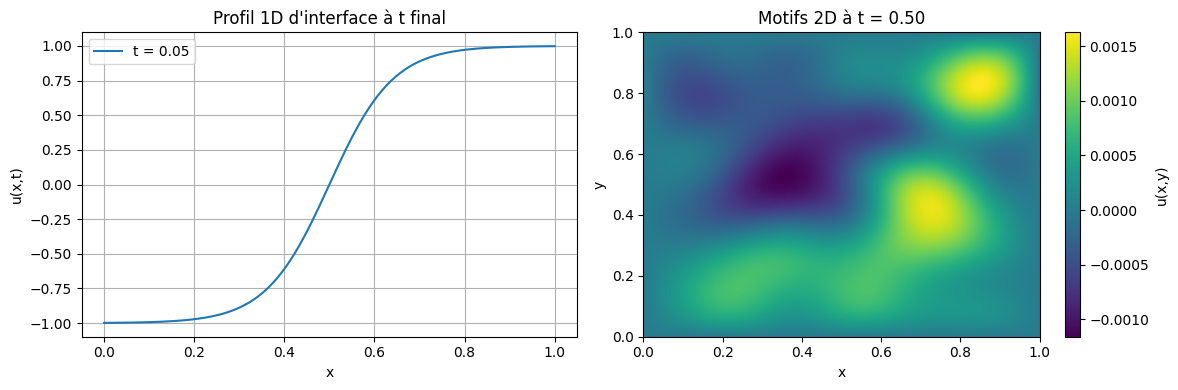

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Affichage côte-à-côte
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Premier plot : profil 1D
axes[0].plot(x1, u1, label=f"t = {Nt1*dt1:.2f}")
axes[0].set_xlabel("x")
axes[0].set_ylabel("u(x,t)")
axes[0].set_title("Profil 1D d'interface à t final")
axes[0].legend()
axes[0].grid(True)

# Deuxième plot : motifs 2D
im = axes[1].imshow(
    u2,
    origin='lower',
    extent=(0, 1, 0, 1),
    aspect='auto'
)
axes[1].set_title(f"Motifs 2D à t = {Nt2*dt2:.2f}")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
fig.colorbar(im, ax=axes[1], label='u(x,y)')

plt.tight_layout()
plt.show()


## 5.3 Analyse des simulations

### 5.1 Profil 1D d’interface  
- **Forme de la transition**  
  On retrouve un front en « tanh » centré en $x=0.5$, reliant rapidement $u\approx-1$ à $u\approx+1$.  
- **Épaisseur du front**  
  Largement cohérente avec $\sqrt{2\,\varepsilon}\approx0.14$, visible sur la pente autour de $x=0.5$.  
- **Stabilité du profil**  
  La forme reste inchangée entre $t=0$ et $t=0.05$, ce qui témoigne de l’équilibre entre diffusion et réaction.

### 5.2 Motifs 2D (spinodal decomposition)  
- **Domaines de phase**  
  On observe des amas $u>0$ (zones jaunes) et $(u<0$ (zones bleue) après $t=0.5$.  
- **Taille de domaine**  
  Les structures ont une échelle caractéristique $\ell\sim\sqrt{\varepsilon\,t}$, ici $\ell\approx\sqrt{0.01\times0.5}\approx0.07$.


## 6 Extension : ajout d’un terme de transport

On enrichit l’équation d’Allen–Cahn par un terme d’advection unidimensionnel constant $v$ :

$
\frac{\partial u}{\partial t}
+ v\,\frac{\partial u}{\partial x}
- \varepsilon\,\frac{\partial^2 u}{\partial x^2}
+ f(u)
= 0.
$

- **Schéma temporel** : Euler explicite.  
- **Diffusion** : différences centrées (Δ²).  
- **Advection** : schéma upwind  

  $
    \frac{\partial u}{\partial x}\Big|_i
    \approx
    \begin{cases}
      \dfrac{u_i - u_{i-1}}{\Delta x},& v\ge0,\\[1em]
      \dfrac{u_{i+1} - u_i}{\Delta x},& v<0.
    \end{cases}
  $
- **CFL combinée** :  
  $\displaystyle |v|\,\frac{\Delta t}{\Delta x}\le1,\quad
    \varepsilon\,\frac{\Delta t}{\Delta x^2}\le\tfrac12.$


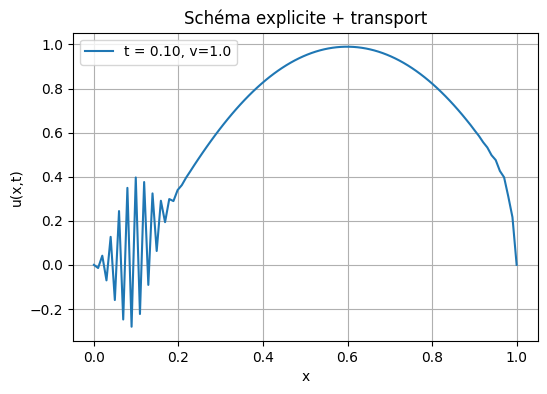

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def solve_explicit_adv(u0, dx, dt, eps, v, Nt):
    """
    Schéma explicite 1D Allen–Cahn + transport (upwind pour advection).
    """
    u = u0.copy()
    N = len(u)
    for n in range(Nt):
        u_new = u.copy()
        # advection upwind
        dudx = np.zeros_like(u)
        if v >= 0:
            dudx[1:] = (u[1:] - u[:-1]) / dx
        else:
            dudx[:-1] = (u[1:] - u[:-1]) / dx
        # diffusion centrée
        lap = (u[2:] - 2*u[1:-1] + u[:-2]) / dx**2

        # mise à jour
        u_new[1:-1] = (
            u[1:-1]
            + dt * (
                - v * dudx[1:-1]
                + eps * lap
                - (u[1:-1]**3 - u[1:-1])
            )
        )
        # conditions aux limites
        u_new[0] = u_new[-1] = 0.0
        u = u_new

    return u

# Exemple d’utilisation
L, epsilon = 1.0, 0.01
Nx = 100
dx = L/(Nx+1)
v = 1.0                   # vitesse de transport
dt = min(0.8*dx/v, 0.4*dx**2/epsilon)
T = 0.1
Nt = int(T/dt)
x = np.linspace(0, L, Nx+2)
u0 = np.sin(np.pi*x)

u_final = solve_explicit_adv(u0, dx, dt, epsilon, v, Nt)

plt.figure(figsize=(6,4))
plt.plot(x, u_final, label=f"t = {Nt*dt:.2f}, v={v}")
plt.xlabel("x"); plt.ylabel("u(x,t)")
plt.title("Schéma explicite + transport")
plt.legend(); plt.grid(True)
plt.show()
